In [1]:
%matplotlib inline
import rootpy.ROOT as R
R.gROOT.SetBatch(True)
import numpy as np
from rootpy.io import root_open, DoesNotExist
from rootpy.plotting import Canvas, Hist, Legend
import rootpy.plotting.root2matplotlib as rplt
import matplotlib.pyplot as plt

In [2]:
input_file = "/Users/danielbrandenburg/bnl/local/work/rcpMaker/products/15/spectra/spectra_06_16_15_Full.root"
data = root_open( input_file )
# noll in the 9 refmult bins
ncoll = [787.9, 639, 455, 284, 171, 75, 18.305]


In [3]:
def normalized_yield( df, plc, cen, charge ) :
    h = df.Get( plc + "/pt_" + str(cen) +"_" + charge  ).Clone( plc +"_" + str(cen) + "_" + charge )
    hnEvents = df.Get( "EventQA/mappedRefMultBins")
    nEvents = hnEvents.GetBinContent( cen + 1 )
    crm = data.EventQA.corrRefMult
    
    for x in range( 1, h.GetNbinsX() + 1 ) :
        be = h.GetBinError( x )
        bc = h.GetBinContent( x )
        pt = h.GetBinCenter( x )
        h.SetBinContent( x, bc / ( 2 * np.pi * nEvents * pt ))
        h.SetBinError( x, be / ( 2 * np.pi * nEvents * pt ) )
        
        if pt < 0.5 or pt > 3.5:
            h.SetBinContent( x, 0)
            h.SetBinError( x, 0 )
        
    print ("n_events = %f"% nEvents )
    return h

n_events = 126657.000000
n_events = 128085.000000
n_events = 279718.000000
n_events = 285337.000000
n_events = 297968.000000
n_events = 574432.507073
n_events = 578918.159755


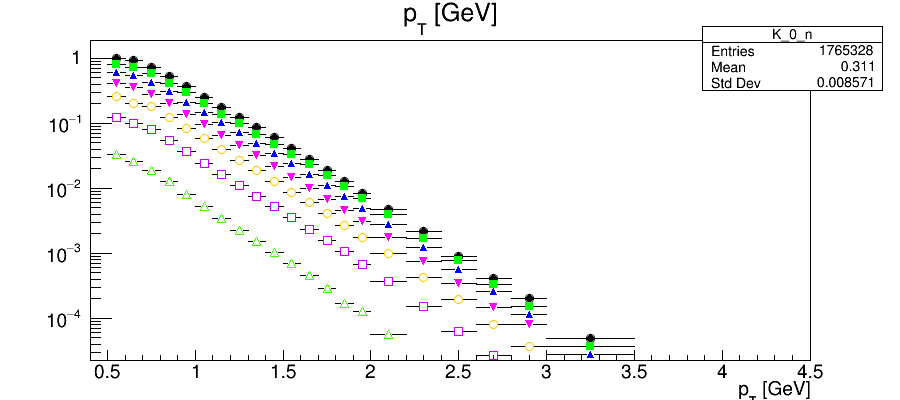

In [4]:
def compare_yields( df, plc, charge ) :
    c = [632, 416, 600, 616, 800, 880, 820, 840, 860, 900]
    h0 = normalized_yield( data, plc, 0, charge )
    h0.Draw()
    
    for x in np.arange( 1, 7 ) :
        h = normalized_yield( data, plc, x, charge )
        h.SetMarkerStyle( 20 + x)
        h.SetMarkerColor( c[ x ] )
        h.Draw( "same" )
    R.gPad.SetLogy(1)
    
    
can = Canvas( width=900, height=400 )
compare_yields( data, "K", "n")

can

In [5]:
def rcp( df, plc, charge, cen = 0, per = 6 ) :
    hCen = normalized_yield( df, plc, cen, charge )
    hPer = normalized_yield( df, plc, per, charge )
    
    hCen.Scale( ncoll[ per ] )
    hPer.Scale( ncoll[ cen ] )
    
    hrcp = hCen.Clone( "rcp_" + plc + "_" + str(cen) + "over" + str(per) + "_" + charge )
    
    hrcp.Divide( hPer );
    hrcp.GetYaxis().SetRangeUser( 0.11, 10 )
    hrcp.SetLineColor( 2 )
    hrcp.SetMarkerColor( 2 )
    hrcp.Draw("")
    
    R.gPad.SetLogy(1)

    return hrcp

In [6]:
can = Canvas( width=1200, height=1200 )


n_events = 126657.000000
n_events = 578918.159755


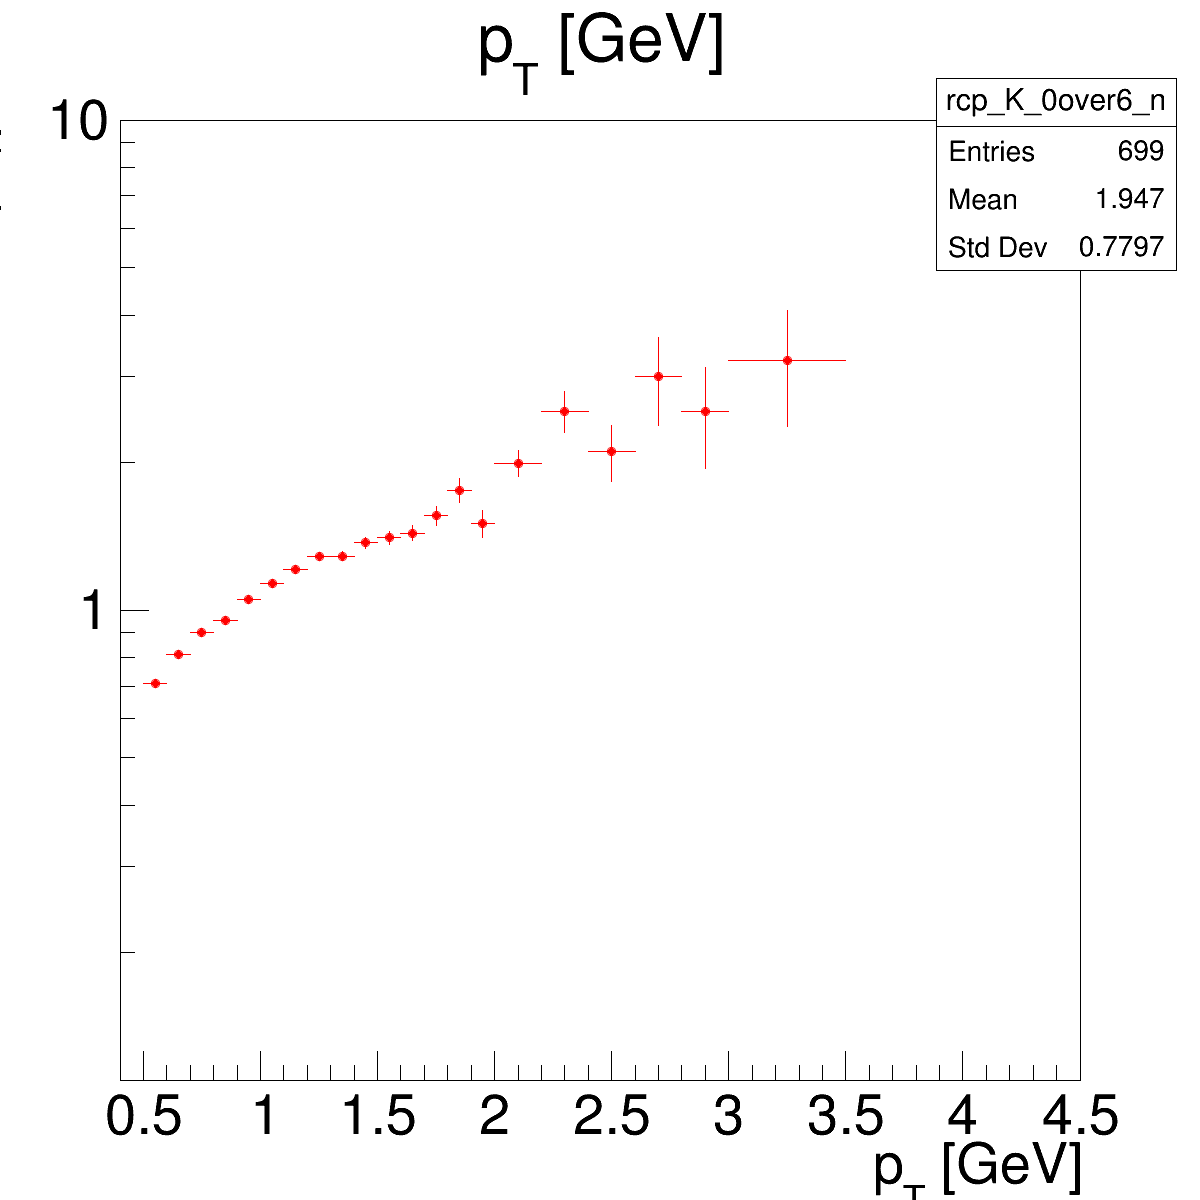

In [7]:
rcp( data, "K", "n", 0, 6 )
can

In [83]:
data.EventQA.mappedRefMultBins.GetBinContent( 7 )

2366107.79541409

In [84]:
crm = data.EventQA.corrRefMult
bl = crm.GetXaxis().FindBin( 5.0 )
bh = crm.GetXaxis().FindBin( 20.0 )
data.EventQA.corrRefMult.Integral( bl, bh )

2366107.79541409